In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
color=["#89CFF0","#FF69B4","#FFD700","#7B68EE","#FF4500",
       "#9370DB","#32CD32","#8A2BE2","#FF6347","#20B2AA",
       "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6",]

In [3]:
df = pd.read_csv("/drive/MyDrive/shopping_trends_updated(in).csv")

In [4]:
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1335,1336,56,Male,Boots,Footwear,49,Nevada,M,Lavender,Fall,4.8,No,2-Day Shipping,Yes,Yes,26,Credit Card,Weekly
262,263,37,Male,Pants,Clothing,40,Hawaii,M,Teal,Summer,3.7,Yes,Next Day Air,Yes,Yes,6,Debit Card,Annually
2364,2365,62,Male,Sunglasses,Accessories,60,Mississippi,L,Maroon,Winter,4.2,No,Free Shipping,No,No,4,PayPal,Quarterly
902,903,43,Male,Hat,Accessories,44,Kentucky,M,Beige,Summer,2.8,Yes,Next Day Air,Yes,Yes,5,Cash,Monthly
2468,2469,65,Male,Skirt,Clothing,21,Connecticut,L,Cyan,Winter,3.7,No,2-Day Shipping,No,No,6,Venmo,Weekly


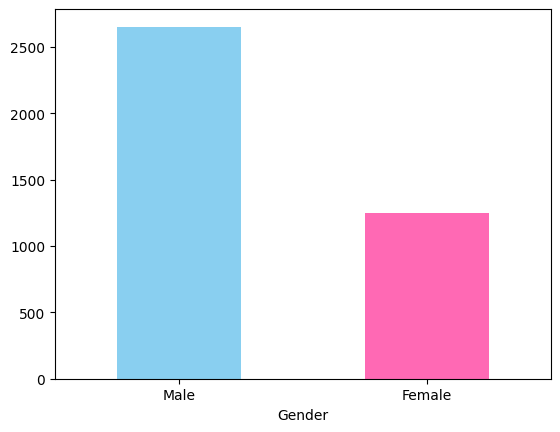

In [5]:
ax= df['Gender'].value_counts().plot(kind='bar', rot=0, color= color)
plt.show()

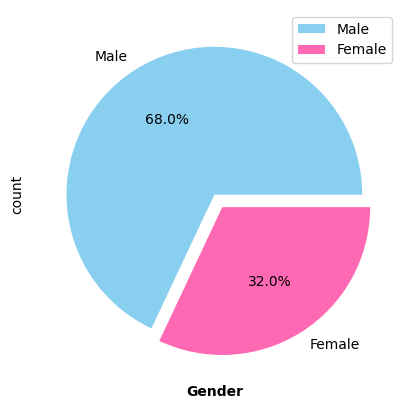

In [6]:
counts = df['Gender'].value_counts()
counts.plot(kind='pie',colors = color, explode=(0,0.1),autopct='%1.1f%%')
plt.xlabel('Gender', weight = 'bold')
plt.legend()
plt.show()

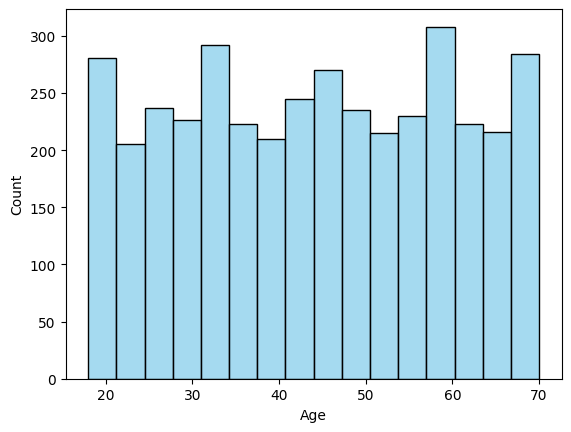

In [7]:
sns.histplot(data=df['Age'], color='skyblue')
plt.show()

In [8]:
df['Category'].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


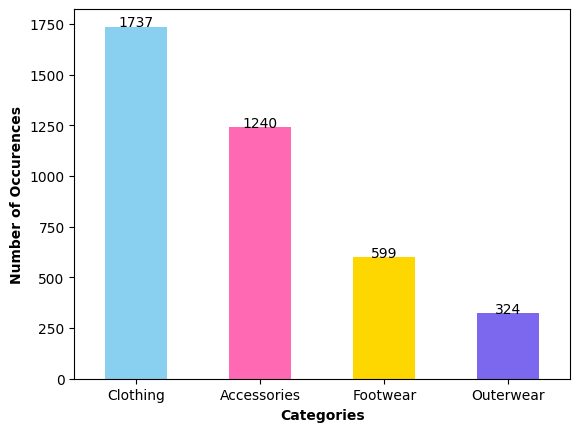

In [9]:
ax = df["Category"].value_counts().plot(kind='bar',color = color, rot=0)

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1), ha='center')

plt.xlabel('Categories', weight="bold")
plt.ylabel('Number of Occurences', weight='bold')
plt.show()

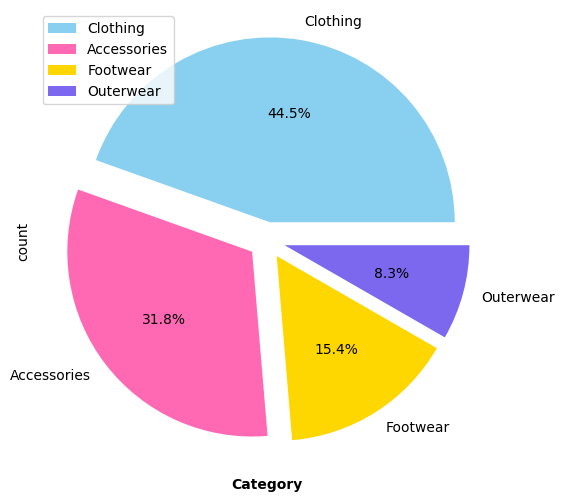

In [10]:
plt.figure(figsize = (20,6))
counts = df["Category"].value_counts()
explode =[0.1]*len(counts)
counts.plot(kind='pie',colors=color, explode=explode, autopct='%1.1f%%')
plt.xlabel('Category',weight='bold')
plt.legend()
plt.show()

In [11]:
def get_pieChart(column):
    plt.figure(figsize=(20,6))
    counts=df[column].value_counts()
    explode=[0]*(len(counts)-1)+[0.1]
    counts.plot(kind='pie',colors=color, explode=explode, autopct='%1.1f%%')
    plt.xlabel(column, weight='bold')
    plt.legend()
    plt.show()

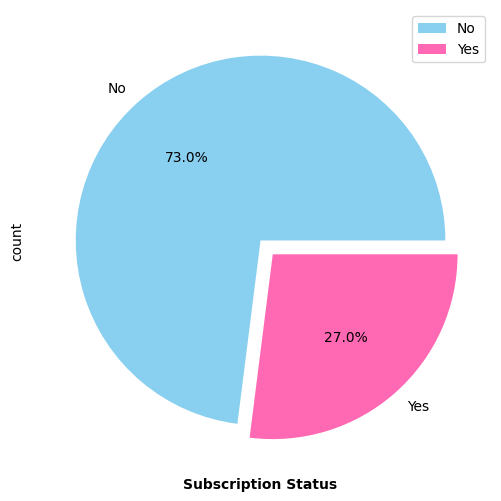

In [12]:
get_pieChart("Subscription Status")

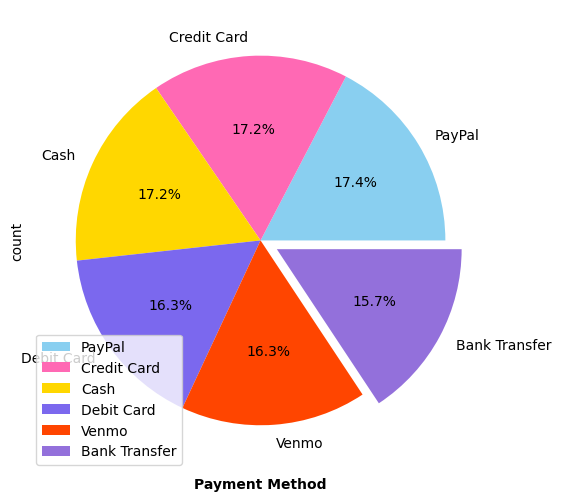

In [13]:
get_pieChart("Payment Method")

In [14]:
def getBarChart(column):
    plt.figure(figsize=(20,6))
    ax = df[column].value_counts().plot(kind='bar',color=color, rot=0)

    for p in ax.patches:
        ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),ha='center')

    plt.xlabel(column, weight="bold")
    plt.ylabel('Number of Occurances', weight='bold')
    plt.show()

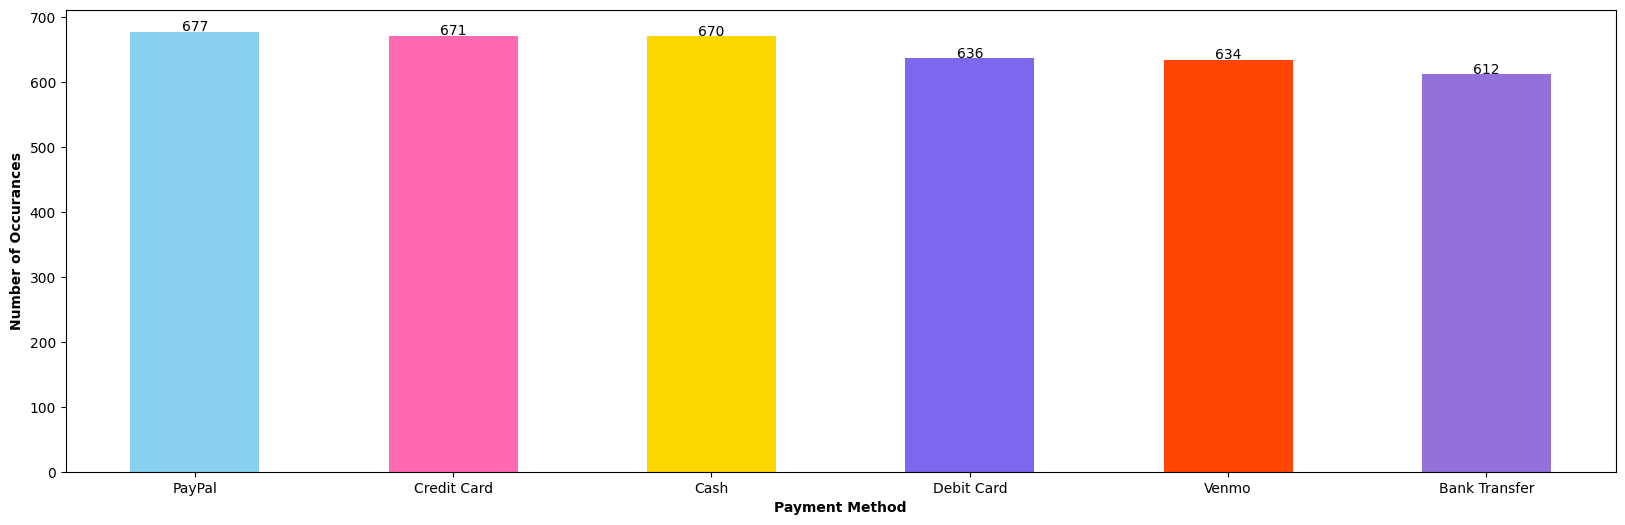

In [15]:
getBarChart('Payment Method')

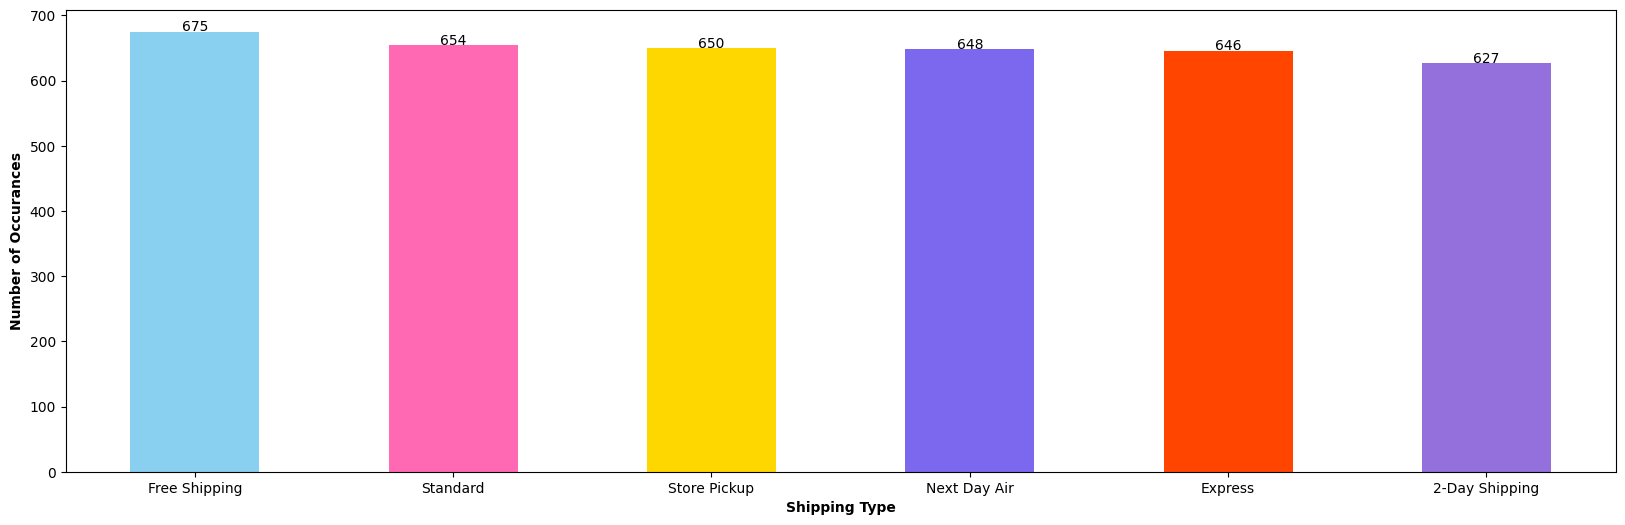

In [16]:
getBarChart('Shipping Type')

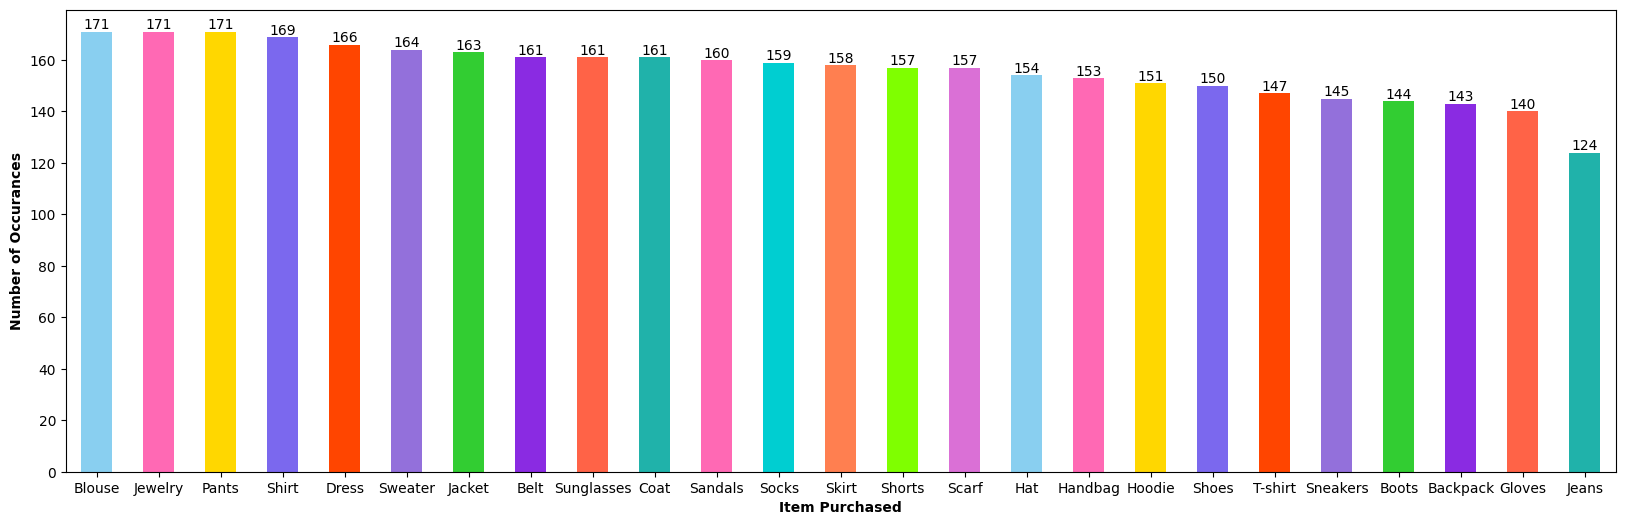

In [17]:
getBarChart('Item Purchased')

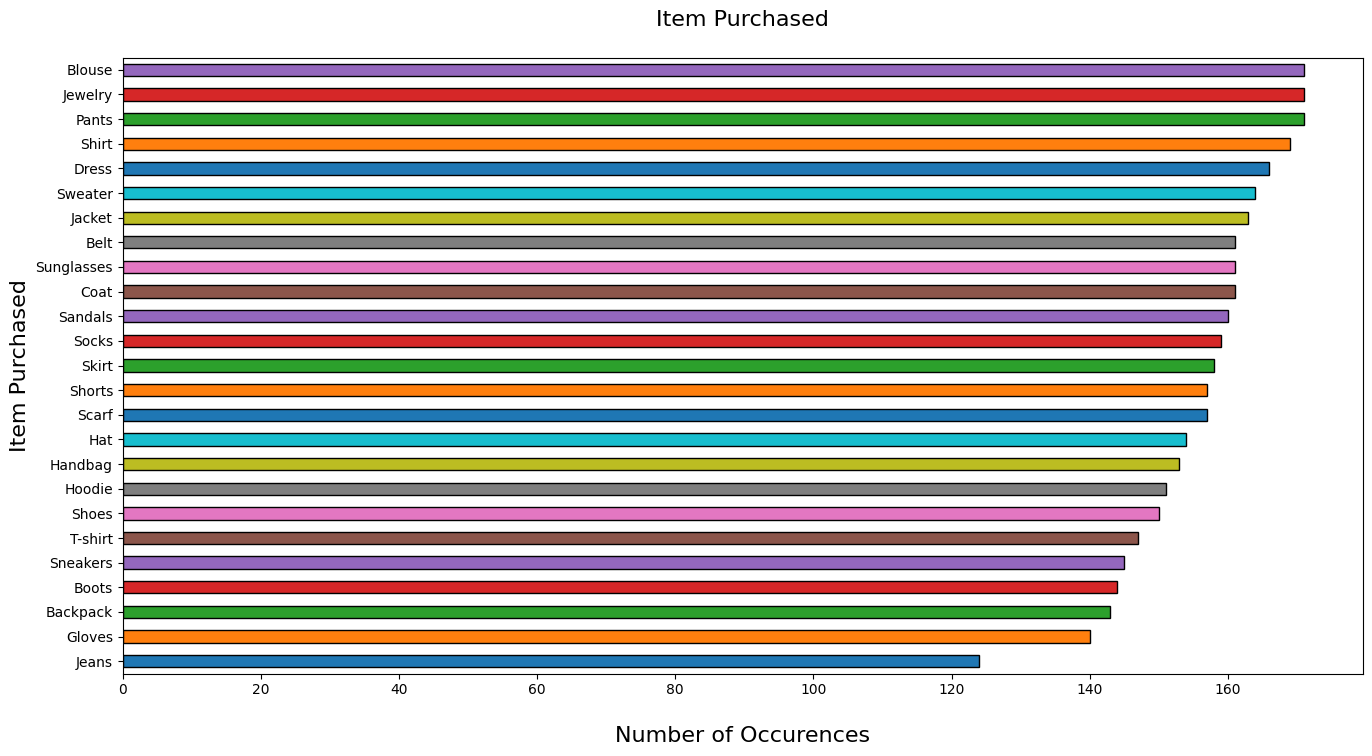

In [18]:
plt.figure(figsize=(16,8))
df['Item Purchased'].value_counts().sort_values().plot(kind='barh',color=sns.color_palette("tab10"),edgecolor='black')

plt.ylabel('Item Purchased', fontsize=16)
plt.xlabel('\nNumber of Occurences',fontsize=16)
plt.title('Item Purchased\n', fontsize=16)

plt.show()

In [19]:
df["Location"].value_counts()

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
Nebraska,87
New York,87
Nevada,87


In [20]:
df["Size"].value_counts()

,count
Size,
M,1755
L,1053
S,663
XL,429


In [21]:
df['Category'].value_counts()
df['Color'].value_counts()
df['Season'].value_counts()

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


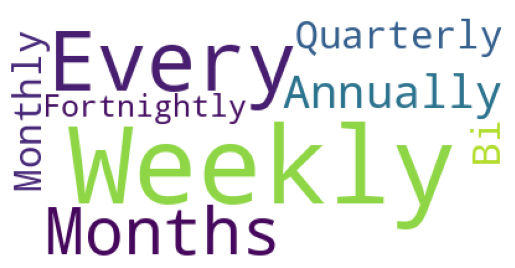

In [22]:
text=" ".join(title for title in df["Frequency of Purchases"])
word_cloud = WordCloud(collocations = False, background_color='white').generate(text)
plt.axis("off")
plt.imshow(word_cloud)
plt.show()

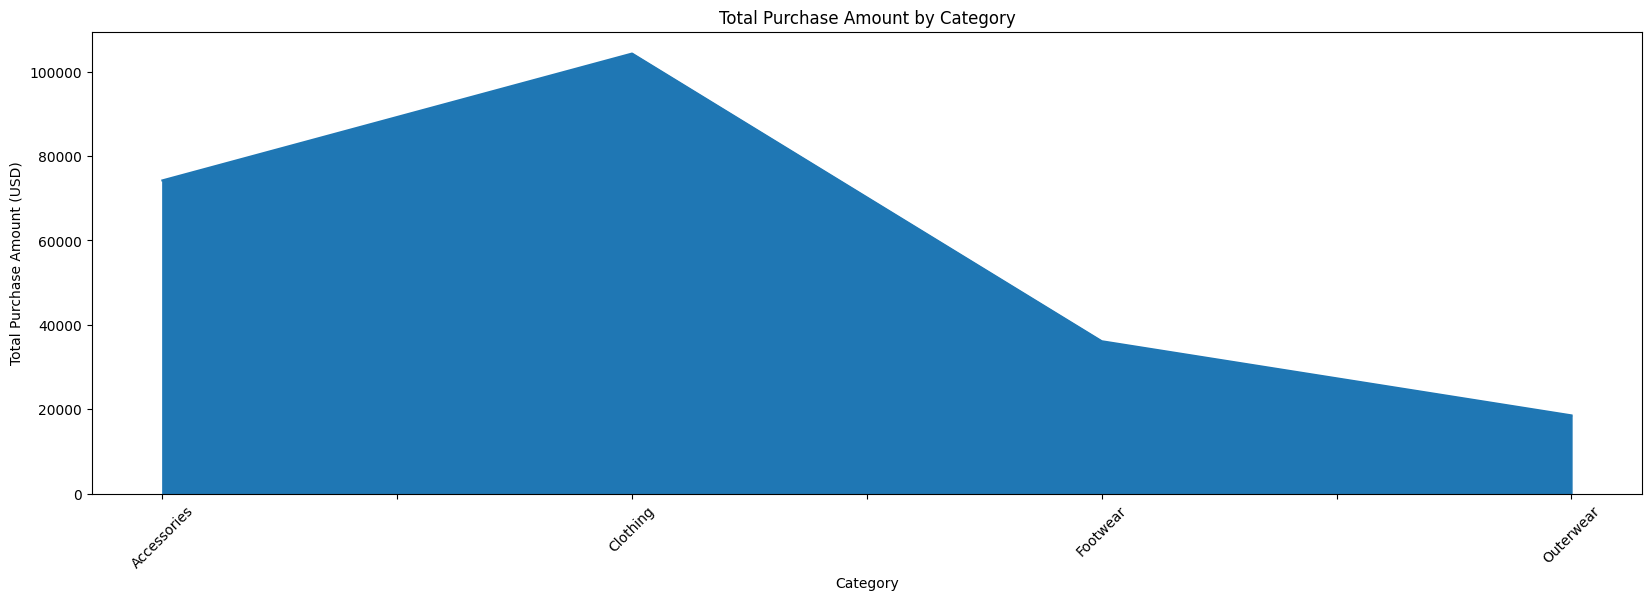

In [25]:
plt.figure(figsize=(20,6))
category_purchase_total = df.groupby('Category')['Purchase Amount (USD)'].sum()

category_purchase_total.plot(kind='area')
plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

In [26]:
# What is the average age of customers in the dataset?
average_age=df['Age'].mean()
print("Average Age:", average_age)

Average Age: 44.06846153846154


In [27]:
#What is the most common item purchased?
df['Item Purchased'].mode()
df['Item Purchased'].mode()[0]

'Blouse'

In [28]:
df[df['Gender']=='Male']['Item Purchased'].mode()

,Item Purchased
0,Pants


In [29]:
df[df['Gender']=='Female']['Item Purchased'].mode()

,Item Purchased
0,Blouse


In [31]:
#What is the most common season for purchase?
most_common_season = df['Season'].mode()[0]
print("Most Common Season for Purchase:", most_common_season)

Most Common Season for Purchase: Spring


In [32]:
#what is the max and min review rating in the dataset
max_review_rating = df['Review Rating'].max()
min_review_rating = df['Review Rating'].min()
print("Maximum Review Rating:", max_review_rating)
print("Minimum Review Rating:", min_review_rating)

Maximum Review Rating: 5.0
Minimum Review Rating: 2.5


In [33]:
#what is the average review rating in the dataset for male and female customers seperately
average_rating_male = df[df['Gender']=='Male']['Review Rating'].mean()
average_rating_female = df[df['Gender']=='Female']['Review Rating'].mean()
print("Average Review Rating for male customers:", average_rating_male)
print("Average Review Rating for female customers:", average_rating_female)

Average Review Rating for male customers: 3.7539592760180995
Average Review Rating for female customers: 3.741426282051282


In [34]:
#what is the most common category of items purchased by male customers in the winter season with a review rating below 3?
common_category_low_rating_male_winter = df[(df['Gender']=='Male')
                                            &(df['Season']=='Winter')
                                            &(df['Review Rating'] < 3)]['Category'].mode()[0]
print("Most common category for low-rating male customers in winter season:", common_category_low_rating_male_winter)

Most common category for low-rating male customers in winter season: Clothing


In [35]:
#how many customers have a subscription status of 'Yes' and used a promo code for their purchase
subscription_promo_count = df[(df['Subscription Status']=='Yes')
                              &(df['Promo Code Used']=='Yes')]['Customer ID'].count()
print("Number of customers with subscription and promo code used:", subscription_promo_count)

Number of customers with subscription and promo code used: 1053
